In [2]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

from pandas import read_csv
from sklearn.model_selection import train_test_split

Using Theano backend.


In [3]:
dataset = read_csv("../datasets/mnist_data/train.csv").values
X_train, X_test, y_train, y_test = train_test_split(dataset[:,1:], dataset[:,0], 
                                                   test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [4]:
X_train, X_test = X_train/255, X_test/255

In [46]:
embedding_n = 2 # For Projecting
inp = Input(shape=(784,))
fc1 = Dense(256, activation='sigmoid')(inp)
emb = Dense(embedding_n, activation='sigmoid')(fc1)
fc2 = Dense(256, activation='relu')(emb)
out = Dense(784)(fc2)

autoencoder = Model(inputs=inp, outputs=out)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 514       
_________________________________________________________________
dense_15 (Dense)             (None, 256)               768       
_________________________________________________________________
dense_16 (Dense)             (None, 784)               201488    
Total params: 403,730
Trainable params: 403,730
Non-trainable params: 0
_________________________________________________________________


In [39]:
autoencoder.layers

In [47]:
encoder = Model(inputs=inp, outputs=emb)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 514       
Total params: 201,474
Trainable params: 201,474
Non-trainable params: 0
_________________________________________________________________


In [41]:
decoder_inp = Input(shape=(embedding_n,))
decoder_out = autoencoder.layers[-1](autoencoder.layers[-2](decoder_inp))
decoder = Model(inputs=decoder_inp, outputs=decoder_out)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               768       
_________________________________________________________________
dense_12 (Dense)             (None, 784)               201488    
Total params: 202,256
Trainable params: 202,256
Non-trainable params: 0
_________________________________________________________________


In [48]:
autoencoder.compile(loss='mse', optimizer='adagrad', metrics=['accuracy'])

In [49]:
hist = autoencoder.fit(X_train, X_train, 
                       epochs=10, 
                       shuffle=True,
                       batch_size=256,
                       validation_data=(X_test, X_test)
                      )

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 2s - loss: 0.0610 - acc: 0.0130 - val_loss: 0.0571 - val_acc: 0.0140
Epoch 2/10
33600/33600 [==============================] - 2s - loss: 0.0563 - acc: 0.0162 - val_loss: 0.0559 - val_acc: 0.0148
Epoch 3/10
33600/33600 [==============================] - 2s - loss: 0.0555 - acc: 0.0173 - val_loss: 0.0553 - val_acc: 0.0142
Epoch 4/10
33600/33600 [==============================] - 2s - loss: 0.0550 - acc: 0.0166 - val_loss: 0.0547 - val_acc: 0.0144
Epoch 5/10
33600/33600 [==============================] - 2s - loss: 0.0545 - acc: 0.0165 - val_loss: 0.0543 - val_acc: 0.0160
Epoch 6/10
33600/33600 [==============================] - 2s - loss: 0.0541 - acc: 0.0165 - val_loss: 0.0540 - val_acc: 0.0135
Epoch 7/10
33600/33600 [==============================] - 2s - loss: 0.0538 - acc: 0.0158 - val_loss: 0.0538 - val_acc: 0.0132
Epoch 8/10
33600/33600 [==============================] - 2s -

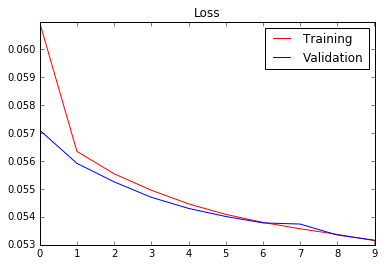

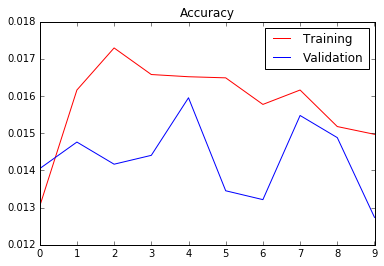

In [50]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Validation')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Validation')
plt.legend()
plt.show()

# Reconstruction

In [51]:
test = X_train[:20]
print(test.shape)
encodings = encoder.predict(test)
print(encodings.shape)
decodings = decoder.predict(encodings)
print(decodings.shape)

(20, 784)
(20, 2)
(20, 784)


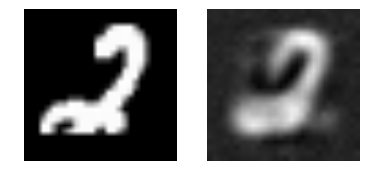

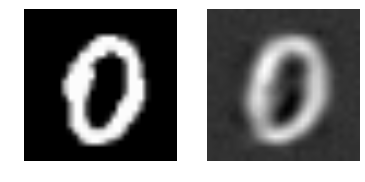

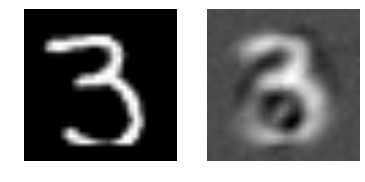

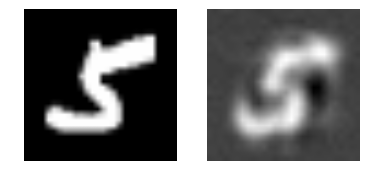

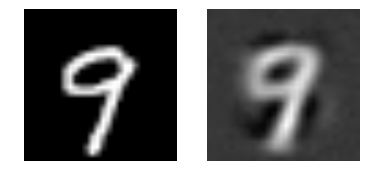

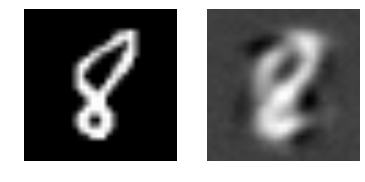

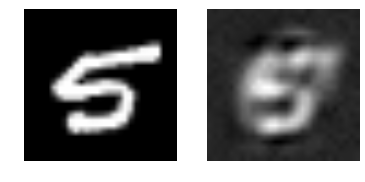

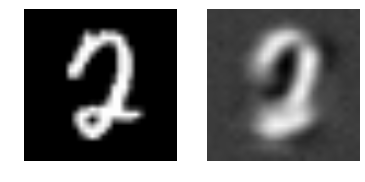

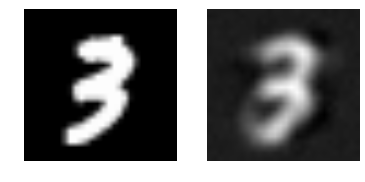

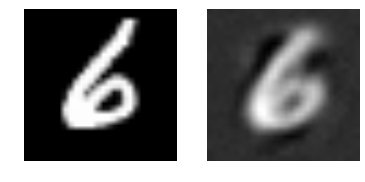

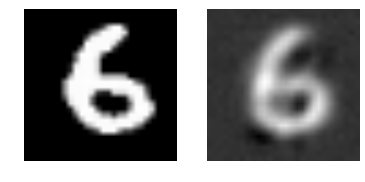

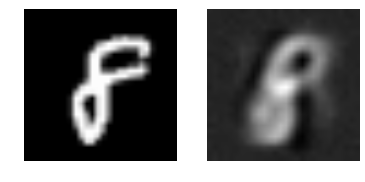

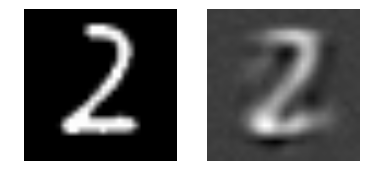

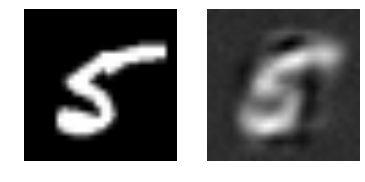

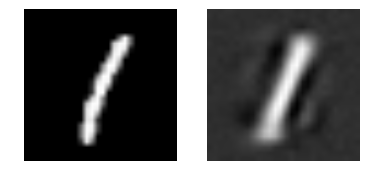

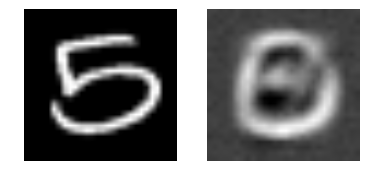

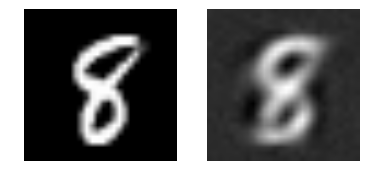

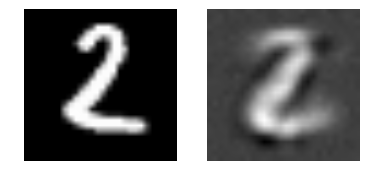

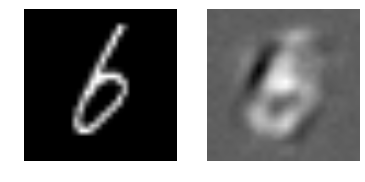

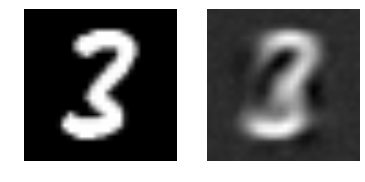

In [37]:
for i in range(test.shape[0]):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(test[i].reshape(28,28), cmap='gray')
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(decodings[i].reshape(28,28), cmap='gray')
    plt.axis("off")
plt.show()

# AE vs PCA

(33600, 2)


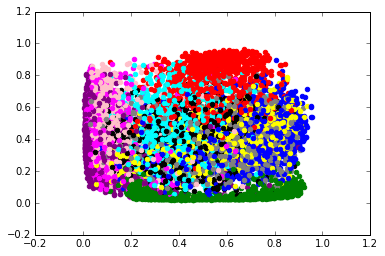

In [52]:
preds = encoder.predict(X_train)
print(preds.shape)
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'purple', 'gray', 'magenta']

plt.figure()
for i in range(10000):
    plt.scatter(preds[i,0], preds[i,1], color=colors[y_train[i]])
plt.show()

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dist = pca.fit_transform(X_train)

In [55]:
dist.shape

(33600, 2)

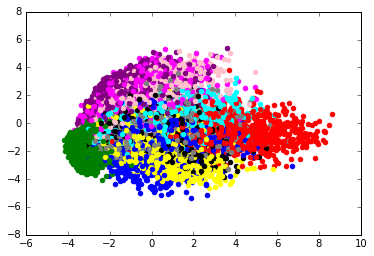

In [56]:
plt.figure()
for i in range(10000):
    plt.scatter(dist[i,0], dist[i,1], color=colors[y_train[i]])
plt.show()